In [8]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [9]:
def correlate(corr_obj,img):
    return cv2.filter2D(img,-1,corr_obj,borderType=cv2.BORDER_CONSTANT)

def match_corr(corr_obj, img): #return coordinate of max corr value
    if((img.shape[0] < corr_obj.shape[0]) or (img.shape[1] < corr_obj.shape[1])):
        return -1
    max_obj=correlate(corr_obj,corr_obj).max()
    img_corr=correlate(corr_obj,img)
    diff=img_corr-max_obj
    abs_diff=np.abs(diff)
    abs_min=abs_diff.min()
    match_coord=np.asarray(np.where(abs_diff == abs_min))
    return np.transpose(match_coord)

In [32]:
def show_gray_image(img, title: str,is_gray=1):
    if not is_gray:
        img = img.astype(np.uint8)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.imshow(img, cmap="gray")
    ax.set_axis_off()
def show_color_image(img, title: str):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.imshow(img)
    ax.set_axis_off()    
def show_histogram(img, num_of_bins=256):
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title("Histogram of gray levels")
    ax.set_xlabel('gray level')
    ax.hist(img.reshape(-1), num_of_bins)
def make_gray(img):
    img = img.astype(np.uint8)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
def crop_frame(img,range_x_start,range_x_end,range_y_start,range_y_end):
    new_img=img[range_y_start:range_y_end,range_x_start:range_x_end]
    return new_img
def show_gray_panorama(img, title: str):
    fig = plt.figure(figsize=(16, 32))
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title(title)
    ax.imshow(img, cmap="gray")
    ax.set_axis_off()
    
def video_to_frames(vid_path: str, start_second, end_second):
    capture = cv2.VideoCapture(vid_path)
    #getting fps and initializing frame_set
    frame_set = []
    fps = int(capture.get(cv2.CAP_PROP_FPS))  
    height=int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    first_frame = start_second*fps
    Last_frame = end_second*fps
    num_of_frames = 1 + (Last_frame-first_frame)
    
    range_x_start=7
    range_x_end=627
    range_y_start=int(height*1/3)
    range_y_end=height
    #saving frames to frame_set
    i = 0
    current_frame = 0
    successful = True
    while (successful and i<num_of_frames):
        successful, next_frame = capture.read()
    #cropping the frames by demand and converting to Grayscale
        next_frame = cv2.cvtColor(crop_frame(next_frame,range_x_start,range_x_end,range_y_start,range_y_end),cv2.COLOR_BGR2GRAY)
        current_frame+=1
        if (successful and current_frame >= first_frame): 
            frame_set.append(next_frame)
            i += 1
    frame_set = np.array(frame_set) # convert to np array,dimensions (T*fps, H, W, C)
    capture.release()
    return frame_set

def video_to_frames_no_crop(vid_path: str, start_second, end_second):
    capture = cv2.VideoCapture(vid_path)
    #getting fps and initializing frame_set
    frame_set = []
    fps = int(capture.get(cv2.CAP_PROP_FPS))  
    height=int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    first_frame = start_second*fps
    Last_frame = end_second*fps
    num_of_frames = 1 + (Last_frame-first_frame)
    
    range_x_start=7
    range_x_end=627
    range_y_start=int(height*1/3)
    range_y_end=height
    #saving frames to frame_set
    i = 0
    current_frame = 0
    successful = True
    while (successful and i<num_of_frames):
        successful, next_frame = capture.read()
        #next_frame = cv2.cvtColor(next_frame,cv2.COLOR_BGR2GRAY)
        current_frame+=1
        if (successful and current_frame >= first_frame): 
            frame_set.append(next_frame)
            i += 1
    frame_set = np.array(frame_set) # convert to np array,dimensions (T*fps, H, W, C)
    capture.release()
    return frame_set

In [11]:
#1.b
captured_video=video_to_frames('../given_data/Corsica.mp4',250,260)

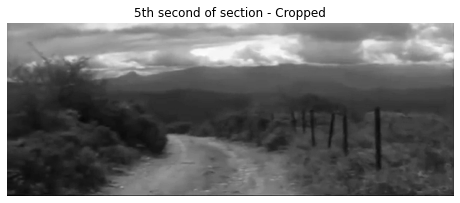

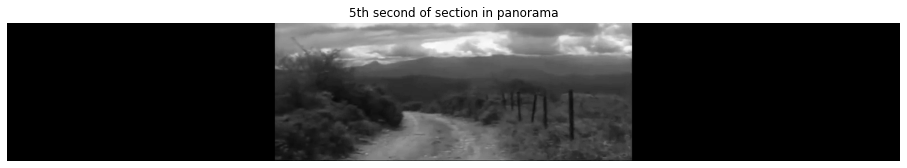

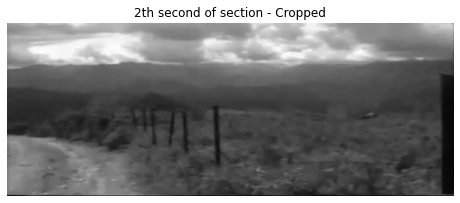

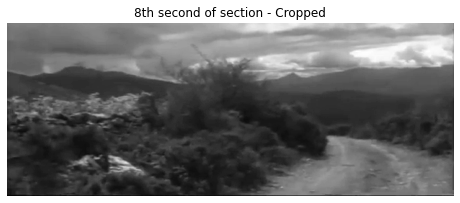

In [12]:
#1.c
panorama_img = np.zeros([240, int(2.5*620)])
middle_img = captured_video[5*25,:]
show_gray_image(middle_img,'5th second of section - Cropped',True)

padding = int((panorama_img.shape[1]-620)/2)
padded_middle_img = np.pad(middle_img,((0,0),(padding,padding)), 'constant', constant_values=0)
panorama_img =panorama_img+padded_middle_img
show_gray_panorama(panorama_img,'5th second of section in panorama')

early_frame = captured_video[2*25,:]
late_frame = captured_video[8*25,:]

show_gray_image(early_frame,'2th second of section - Cropped',True)
show_gray_image(late_frame,'8th second of section - Cropped',True)



<Figure size 432x288 with 0 Axes>

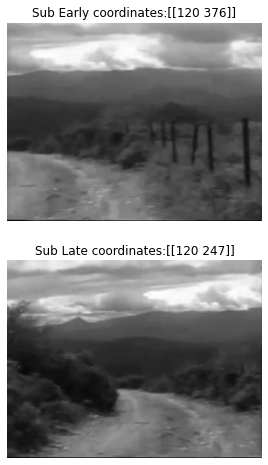

In [13]:
#1.d 
rectangle_width = 310
sub_early=early_frame[:,1:rectangle_width]
sub_late=late_frame[:,-rectangle_width:-1]

early_coord = match_corr(np.float64(sub_early), np.float64(middle_img))
late_coord = match_corr(np.float64(sub_late), np.float64(middle_img))

fig = plt.figure()
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_title('Sub Early coordinates:'+ str(early_coord))
ax1.imshow(sub_early, cmap="gray")
ax1.set_axis_off()

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_title('Sub Late coordinates:'+ str(late_coord))
ax2.imshow(sub_late, cmap="gray")
ax2.set_axis_off()

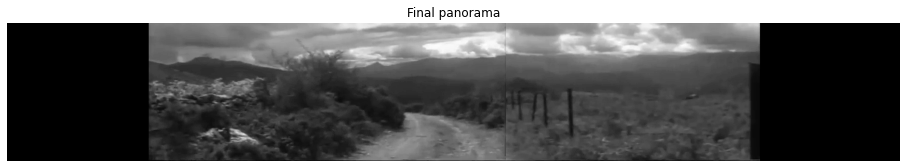

In [14]:
#1.e
early_rows, early_cols= early_frame.shape
panorama_rows, panorama_col = panorama_img.shape

late_rows, late_cols = late_frame.shape
panorama_2 = panorama_img.copy()
img_start = int(panorama_col/2) - 310

sub_late_r, sub_late_c = sub_late.shape
sub_early_r, sub_early_c = sub_early.shape

early_begin = img_start+early_coord[0][1]-int(sub_early_c/2)
early_end = early_begin+early_cols

late_end = img_start+late_coord[0][1]+int(sub_late_c/2)
late_begin = late_end - late_cols

panorama_2[:,early_begin:early_end] = early_frame
panorama_2[:,late_begin:late_end] = late_frame

show_gray_panorama(panorama_2, 'Final panorama')

# Part 2 - Spatial Filtering and Morphological Operations

# 2.a - Morphological operations

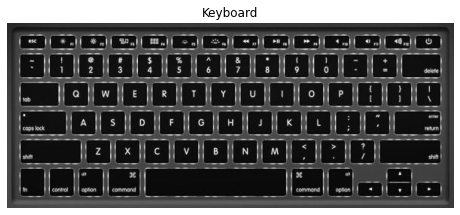

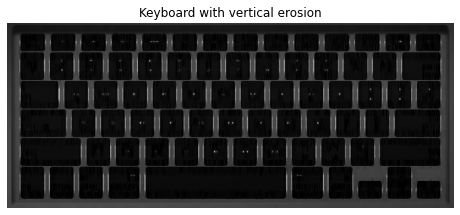

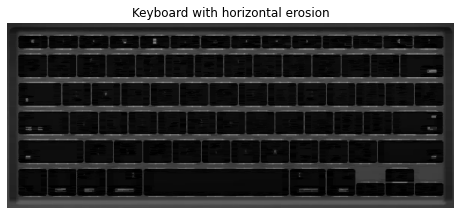

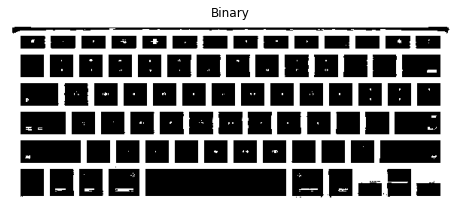

In [15]:
keyboard = cv2.imread("../given_data/keyboard.jpg")
keyboard_RGB = cv2.cvtColor(keyboard, cv2.COLOR_BGR2RGB)
kernal_a_vert=np.ones([8,1])
kernal_b_horiz=np.ones([1,8])
show_color_image(np.uint8(keyboard_RGB),'Keyboard')
#show_color_image(np.uint8(kernal_b_horiz),'b')
#show_color_image(np.uint8(kernal_a_vert),'a')
A_eroded=cv2.erode(keyboard_RGB,kernal_a_vert)
B_eroded=cv2.erode(keyboard_RGB,kernal_b_horiz)
show_color_image(np.uint8(A_eroded),'Keyboard with vertical erosion')
show_color_image(np.uint8(B_eroded),'Keyboard with horizontal erosion')
threshold=0.2*255
sum_both=A_eroded+B_eroded
binary=np.zeros(sum_both.shape)
binary[sum_both>threshold]=255
show_color_image(np.uint8(binary),'Binary')

# 2.b - Median filtering

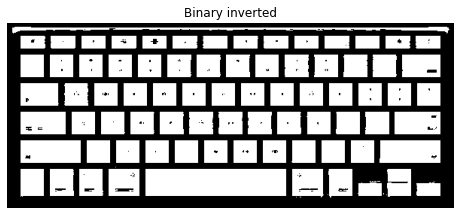

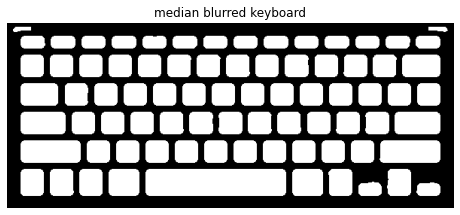

In [16]:
binary_inverse=np.zeros(binary.shape)
binary_inverse[binary==0]=255
show_color_image(np.uint8(binary_inverse),'Binary inverted')
binary_inverse = cv2.cvtColor(np.uint8(binary_inverse), cv2.COLOR_RGB2GRAY)
median_img=cv2.medianBlur(binary_inverse,ksize=9)
show_gray_image(np.uint8(median_img),'median blurred keyboard',1)

# 2.c - Back to morphological operations

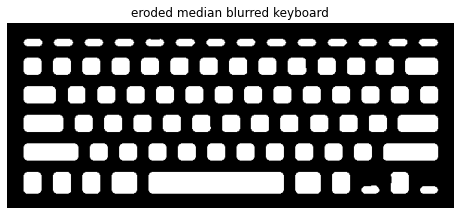

In [17]:
kernel_2c=np.ones([8,8])
eroded_median_img=cv2.erode(median_img,kernel_2c)
show_gray_image(np.uint8(eroded_median_img),'eroded median blurred keyboard',1)

# 2.d - Image sharpening and final thresholding

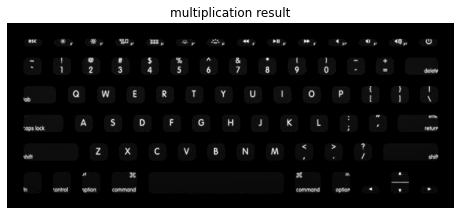

In [18]:
mask=np.zeros(eroded_median_img.shape)
mask[eroded_median_img==255]=1
keyboard_GRAY=cv2.cvtColor(np.uint8(keyboard), cv2.COLOR_BGR2GRAY)
keyboard_mask_multiplication=np.multiply(np.uint8(keyboard_GRAY),np.uint8(mask))
show_gray_image(keyboard_mask_multiplication,"multiplication result",1)

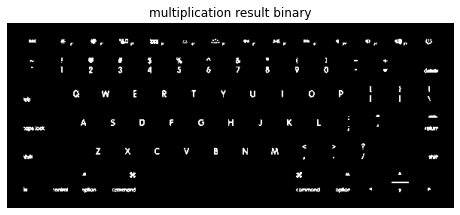

In [19]:
multiplication_binary_keys=np.zeros(keyboard_mask_multiplication.shape)
multiplication_binary_keys[keyboard_mask_multiplication>80]=256
show_gray_image(multiplication_binary_keys,"multiplication result binary",1)

# Part 3 - Image Restoration

# 3.a - Pre-processing - Creating a noisy image

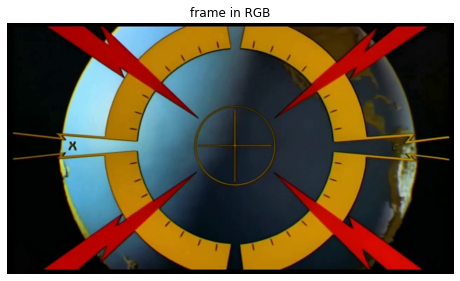

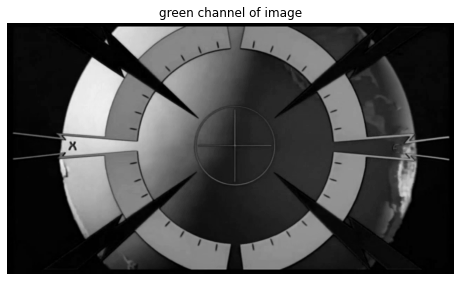

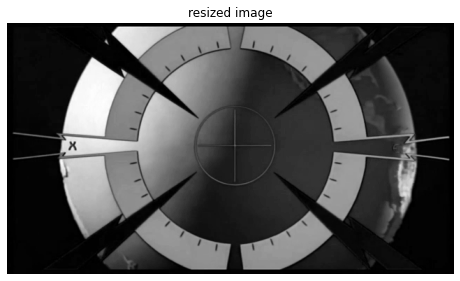

In [40]:
flash_img=np.squeeze(video_to_frames_no_crop('../given_data/Flash Gordon Trailer.mp4',20,20), axis=0)
flash_img_RGB= cv2.cvtColor(flash_img, cv2.COLOR_BGR2RGB)
show_color_image(flash_img_RGB,"frame in RGB")

green_channel = flash_img[:,:,1]
show_gray_image(green_channel,"green channel of image",1)

scale_percent = 50 # percent of original size
width = int(green_channel.shape[1] * scale_percent / 100)
height = int(green_channel.shape[0] * scale_percent / 100)
dim = (width, height)
new_size_img=cv2.resize(green_channel,dim)
show_gray_image(new_size_img,"resized image",1)



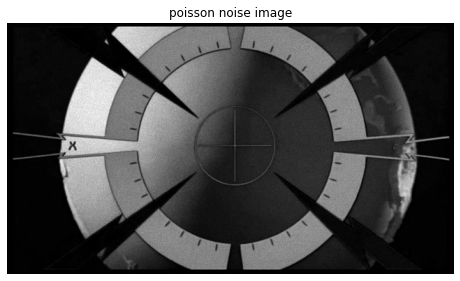

In [36]:
def poisson_noisy_image(X, a):
    float_X=X.astype(float)
    new_img=a*float_X
    new_img=np.random.poisson(new_img,float_X.shape)
    Y=np.uint8(np.clip((new_img/a),0,255))
    return Y
poisson_image=poisson_noisy_image(new_size_img,3)
show_gray_image(poisson_image,"poisson noise image",1)

# 3.b - Denoise by L2

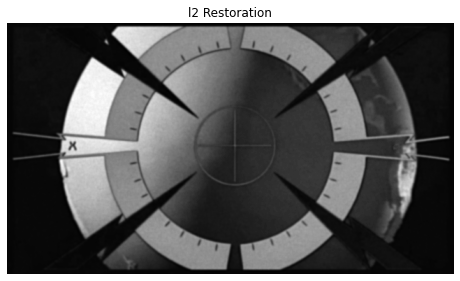

<Figure size 432x288 with 0 Axes>

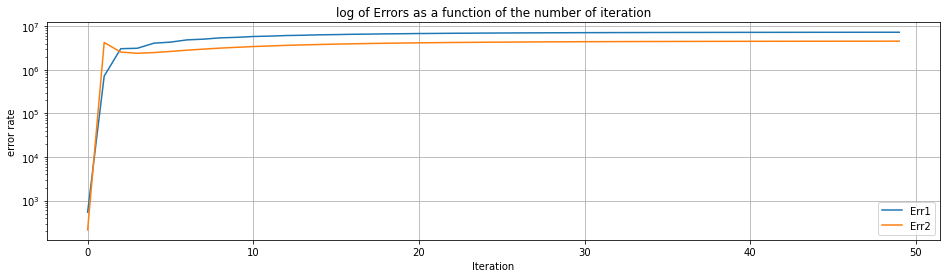

In [38]:
def denoise_by_l2(Y, X, num_iter, lambda_reg):
    D_kernel= np.array([[0,1,0],[1,-4,1],[0,1,0]])
    X_cs=X.flatten('F') 
    Y_cs=Y.flatten('F')
    Err1=np.zeros(num_iter)
    Err2=np.zeros(num_iter)
    
    X_k_cs=Y_cs
    for i in range(num_iter):
        X_k=np.reshape(X_k_cs,X.shape,order='F')
        DX_tmp=correlate(X_k,D_kernel).flatten('F')
        Err1[i]=(X_k_cs-Y_cs).T@(X_k_cs-Y_cs)+lambda_reg*(DX_tmp).T@(DX_tmp)
        Err2[i]=(X_k_cs-X_cs).T@(X_k_cs-X_cs)
        corr_res_1=correlate(D_kernel,X_k)
        corr_res_2=correlate(D_kernel.T,corr_res_1)
        lambda_matrix=lambda_reg*corr_res_2
        lambda_cs=lambda_matrix.flatten('F')
        
        gradiant_cs=X_k_cs+lambda_cs-Y_cs
        gradiant=np.reshape(gradiant_cs,X.shape,order='F')
        up=(gradiant_cs.T@gradiant_cs)
        down=gradiant_cs.T@(gradiant_cs+(lambda_reg*correlate(D_kernel.T,correlate(D_kernel,gradiant))).flatten('F'))
        mue_k=up/down

        X_k_cs=X_k_cs-mue_k*gradiant_cs
        
    
    Xout=np.reshape(X_k_cs,X.shape,order='F')
    return Xout, Err1, Err2

Xout_L2, err1_L2, err2_L2 = denoise_by_l2(poisson_image,new_size_img,50,0.5)
show_gray_image(Xout_L2,'l2 Restoration',1)

fig = plt.figure()
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(err1_L2,label='Err1')
ax.plot(err2_L2,label='Err2')
ax.set_yscale('log')
ax.set_xlabel("Iteration")
ax.set_ylabel("error rate")
ax.set_title("log of Errors as a function of the number of iteration")
ax.grid()
ax.legend()



# 3.c - Denoise by Total Variation

In [26]:
def divergence(Field):
    return np.sum(np.gradient(Field),axis=0)

def denoise_by_TV(Y, X, num_iter, lambda_reg, epsilon0):
    X_cs=X.flatten('F') 
    Y_cs=Y.flatten('F')
    Err1=np.zeros(num_iter)
    Err2=np.zeros(num_iter)
    mue=150*epsilon0
    X_k_cs=Y_cs
    
    for i in range(num_iter):
        X_k=np.reshape(X_k_cs,X.shape,order='F')
        x_grad,y_grad=np.gradient(X_k)
        TV_k=np.sum(np.sqrt(x_grad**2 + y_grad**2))
        down=np.sqrt(x_grad**2+y_grad**2+epsilon0**2)
        
        lap_x=divergence(x_grad/down)
        lap_y=divergence(y_grad/down)
        lap=lap_x+lap_y
        lambda_res=lambda_reg*lap
            
        U_k=2*(Y-X_k)+lambda_res
        X_k=X_k+(mue/2)*U_k
        X_k_cs=X_k.flatten('F')
        Err1[i]=((X_k_cs-Y_cs).T)@(X_k_cs-Y_cs)+lambda_reg*TV_k
        Err2[i]=((X_k_cs-X_cs).T)@(X_k_cs-X_cs)
    
    Xout=np.reshape(X_k_cs,X.shape,order='F')
    return Xout, Err1, Err2

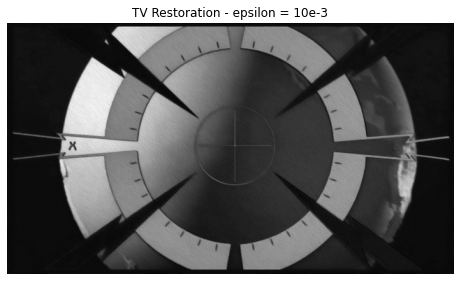

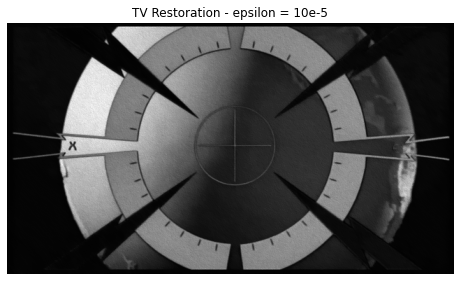

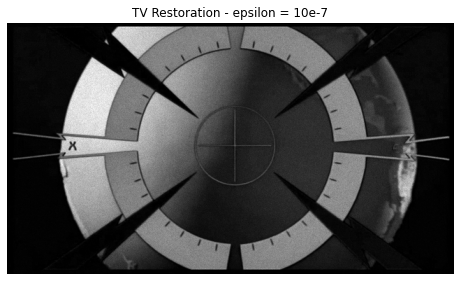

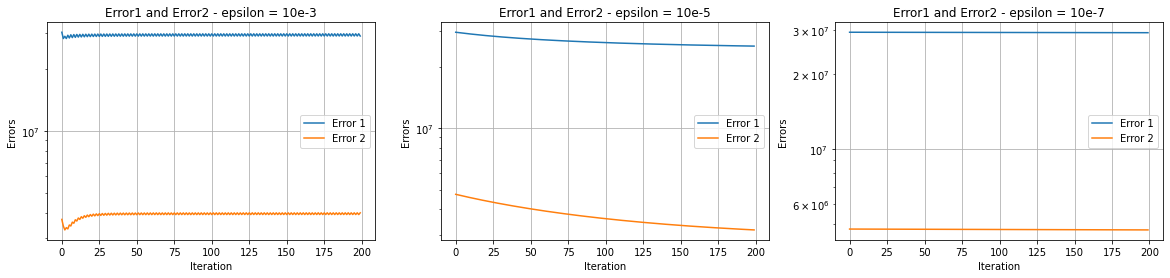

In [27]:
Xout_TV_3, err1_TV_3, err2_TV_3 = denoise_by_TV(poisson_image,new_size_img, 200, 20, 10**-3)
Xout_TV_5, err1_TV_5, err2_TV_5 = denoise_by_TV(poisson_image,new_size_img, 200, 20, 10**-5)
Xout_TV_7, err1_TV_7, err2_TV_7 = denoise_by_TV(poisson_image,new_size_img, 200, 20, 10**-7)
show_gray_image(Xout_TV_3,'TV Restoration - epsilon = 10e-3')
show_gray_image(Xout_TV_5,'TV Restoration - epsilon = 10e-5')
show_gray_image(Xout_TV_7,'TV Restoration - epsilon = 10e-7')

fig = plt.figure(figsize=(20, 4))
# ax = fig.add_subplot(1, 2, 1)
ax = fig.add_subplot(1, 3, 1)
ax.plot(err1_TV_3, label='Error 1')
ax.plot(err2_TV_3, label='Error 2')
ax.set_yscale('log')
ax.set_xlabel("Iteration")
ax.set_ylabel("Errors")
ax.set_title("Error1 and Error2 - epsilon = 10e-3")
ax.grid()
ax.legend()

ax5 = fig.add_subplot(1, 3, 2)
ax5.plot(err1_TV_5, label='Error 1')
ax5.plot(err2_TV_5, label='Error 2')
ax5.set_yscale('log')
ax5.set_xlabel("Iteration")
ax5.set_ylabel("Errors")
ax5.set_title("Error1 and Error2 - epsilon = 10e-5")
ax5.grid()
ax5.legend()

ax7 = fig.add_subplot(1, 3, 3)
ax7.plot(err1_TV_7, label='Error 1')
ax7.plot(err2_TV_7, label='Error 2')
ax7.set_yscale('log')
ax7.set_xlabel("Iteration")
ax7.set_ylabel("Errors")
ax7.set_title("Error1 and Error2 - epsilon = 10e-7")
ax7.grid()
ax7.legend()

<Figure size 432x288 with 0 Axes>

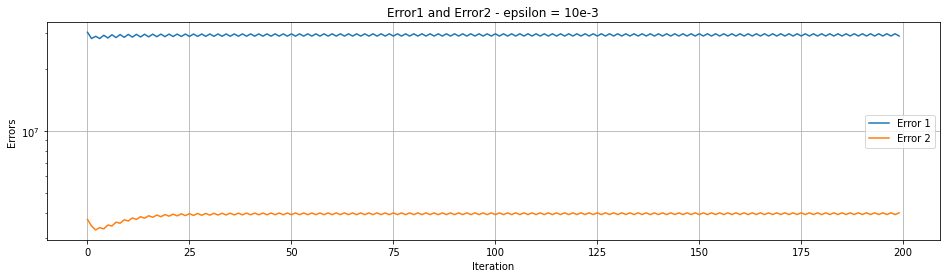

In [28]:
fig = plt.figure()
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(err1_TV_3, label='Error 1')
ax.plot(err2_TV_3, label='Error 2')
ax.set_yscale('log')
ax.set_xlabel("Iteration")
ax.set_ylabel("Errors")
ax.set_title("Error1 and Error2 - epsilon = 10e-3")
ax.grid()
ax.legend()

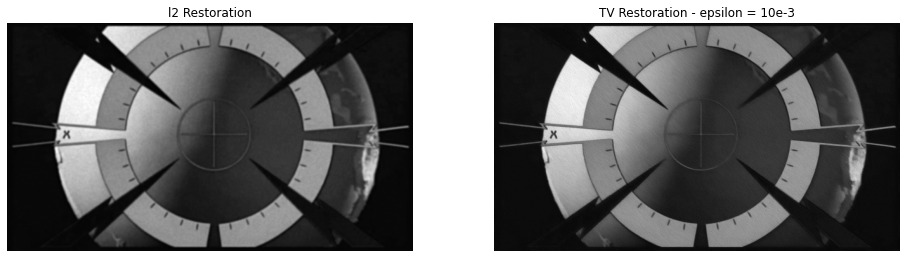

<Figure size 432x288 with 0 Axes>

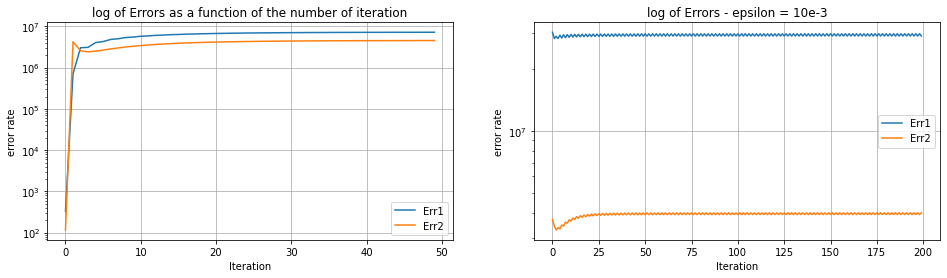

In [29]:
#3.d
fig1 = plt.figure(figsize=(16, 8))
ax = fig1.add_subplot(1, 2, 1)
ax.set_title('l2 Restoration')
ax.imshow(Xout_L2, cmap="gray")
ax.set_axis_off()
ax = fig1.add_subplot(1, 2, 2)
ax.set_title('TV Restoration - epsilon = 10e-3')
ax.imshow(Xout_TV_3, cmap="gray")
ax.set_axis_off()

fig = plt.figure()
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(err1_L2,label='Err1')
ax.plot(err2_L2,label='Err2')
ax.set_yscale('log')
ax.set_xlabel("Iteration")
ax.set_ylabel("error rate")
ax.set_title("log of Errors as a function of the number of iteration")
ax.grid()
ax.legend()
ax3 = fig.add_subplot(1, 2, 2)
ax3.plot(err1_TV_3, label='Err1')
ax3.plot(err2_TV_3, label='Err2')
ax3.set_yscale('log')
ax3.set_xlabel("Iteration")
ax3.set_ylabel("error rate")
ax3.set_title("log of Errors - epsilon = 10e-3")
ax3.grid()
ax3.legend()


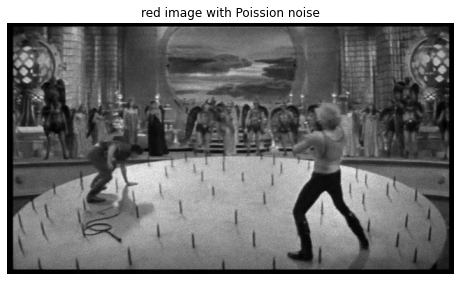

In [41]:
#3.e
new_img =np.squeeze(video_to_frames_no_crop('../given_data/Flash Gordon Trailer.mp4',38,38), axis=0)
new_img_red = new_img[:,:,2]

scale_percent = 50 # percent of original size
width = int(green_channel.shape[1] * scale_percent / 100)
height = int(green_channel.shape[0] * scale_percent / 100)
dim = (width, height)
red_img=cv2.resize(new_img_red,dim)
poisson_red=poisson_noisy_image(red_img,3)
show_gray_image(poisson_red,'red image with Poission noise')

R_xout_L2,R_ERR1_L2,R_ERR2_L2 = denoise_by_l2(poisson_red, red_img, 50, 0.5)
R_xout_TV,R_ERR1_TV,R_ERR2_TV = denoise_by_TV(poisson_red, red_img, 200, 20, 0.0001)


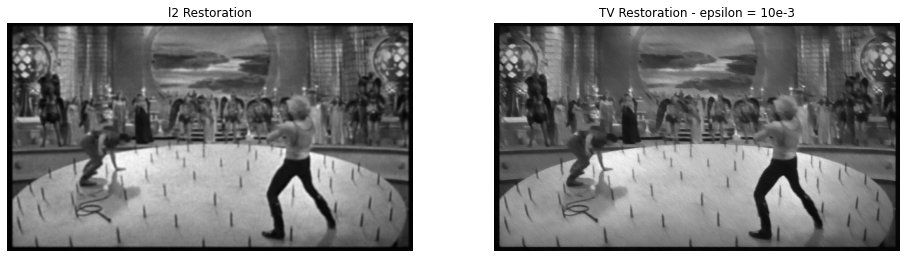

<Figure size 432x288 with 0 Axes>

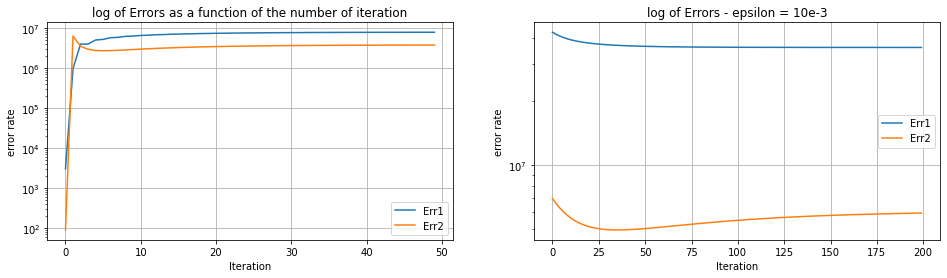

In [31]:
#3.e
fig1 = plt.figure(figsize=(16, 8))
ax = fig1.add_subplot(1, 2, 1)
ax.set_title('l2 Restoration')
ax.imshow(R_xout_L2, cmap="gray")
ax.set_axis_off()
ax = fig1.add_subplot(1, 2, 2)
ax.set_title('TV Restoration - epsilon = 10e-3')
ax.imshow(R_xout_TV, cmap="gray")
ax.set_axis_off()

fig = plt.figure()
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(R_ERR1_L2,label='Err1')
ax.plot(R_ERR2_L2,label='Err2')
ax.set_yscale('log')
ax.set_xlabel("Iteration")
ax.set_ylabel("error rate")
ax.set_title("log of Errors as a function of the number of iteration")
ax.grid()
ax.legend()
ax3 = fig.add_subplot(1, 2, 2)
ax3.plot(R_ERR1_TV, label='Err1')
ax3.plot(R_ERR2_TV, label='Err2')
ax3.set_yscale('log')
ax3.set_xlabel("Iteration")
ax3.set_ylabel("error rate")
ax3.set_title("log of Errors - epsilon = 10e-3")
ax3.grid()
ax3.legend()
